#Data as a matrix

As discussed earlier, it is useful to think of a data set as a matrix where each row corresponds to a matrix. This is especially useful if we want to predict something from data, as we often do in machine learning. For example, if we are trying to predict a single scalar value based on a set of inputs, then the inputs correpond to the different columns in our matrix. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt


from IPython.display import display, HTML

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [2]:
display(HTML('''<img src="./imgs/lecture-4/sample-data.png" alt="Drawing" style="width: 350px;"/, align = "left">'''))

It is sometimes helpful to visualize a data set in a vector space as shown above. In this view you can think of each sample (each row) as a single dot. Of course, real data usually is not neaetly so linearly structured, but it is almost always somehow structured. The tools we discuss in this class assume that the data are in some hyperplane. 

# The "inverse" problem or "Ordinary Least Squares"

The forward problem is for a given $\beta \in \mathbb{R}^n$ and $X \in \mathbb{R}^{m\times n}$ to compute $y = X\beta$ with $y \in \mathbb{R}^m$. These operations are fairly straightforward. Things get intersting when we deal with the inverse problem.

The inverse problem is for a given $y \in \mathbb{R}^m$ and $X \in \mathbb{R}^{m\times n}$  we want to find $\beta$ so that $y \approx X\beta$. Ideally, we want $y = X\beta$ but often exactly eqaulity is not possible. 

So we want to find a $\beta$ that is as *close* as possible to 

Geometrically, this is what this looks like:

In [3]:
display(HTML('''<img src="./imgs/lecture-4/Linear_least_squares_geometric_interpretation.png" alt="Drawing" style="width: 350px;"/, align = "left">'''))

We can think of $y - X\beta$ as just a vector - sometimes called a "residual" or error vector. We want to find a $\beta$ so that the *magnitude* of the error vector is as small.  We can use the 2-norm as a measure of the magnitude of the error vector. 

In particular, we want to find a $\beta$ so that the *squared* of the magntiude is small:

$||(y - X\beta)||_{2}^{2}$

We think of this as a **loss function**. The loss function measures how irritated we are that $||(y - X\beta)||_{2}^{2} \neq 0$

This is equivalent to writing:

$L(\beta) = (y - X\beta)^{T}(y - X\beta)^{T}$

In short, we would like to find a $\beta$ that minimizes our loss function $L(\beta)$. For this, we can use calculus and find the stationary point. This yields the so-called **normal equations**

$X^{T}X\beta = X^{T}y$ 

If the inverse of $X^{T}X$ exists, then we have

$\beta = (X^{T}X)^{-1}X^{T}y$

If the inverse of $X^{T}X$ does *not* exist, then we can use the psuedo-inverse:

$\beta = (X^{T}X)^{+}X^{T}y$

In [4]:
display(HTML('''<img src="./imgs/lecture-4/old-geomteric.png" alt="Drawing" style="width: 450px;"/, align = "left">'''))

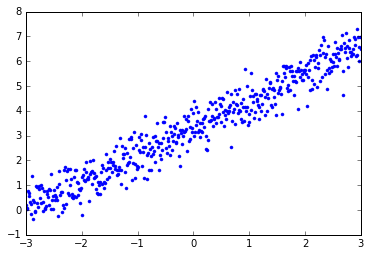

In [5]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig =  3.3 + 1.1*x 
## Add white noise
y =  y_orig + .5*np.random.randn(N)
plt.plot(x, y, '.')

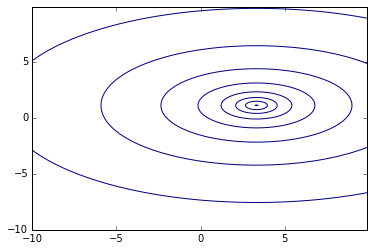

In [6]:
def loss_func(w0, w1, X, y):
    losses = 0
    for i in range(X.shape[0]):
        losses += (w0 + X[i]*w1 - y[i])**2
    return losses
 
w0 = np.arange(-10.0,10.0,0.1)
w1 = np.arange(-10.0,10.0,0.1)
W0,W1 = plt.meshgrid(w0, w1)
Z = loss_func(W0, W1, x, y)
plt.contour(W0, W1, Z, levels = np.logspace(0, 8, 20))

In [7]:
data = np.hstack((np.ones((N,1)), x[:,np.newaxis]))


weights = np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T), y)

In [8]:
y_hat = np.dot(data, weights)
np.mean(np.sqrt((y_hat - y_orig)**2))

0.023890611951872774

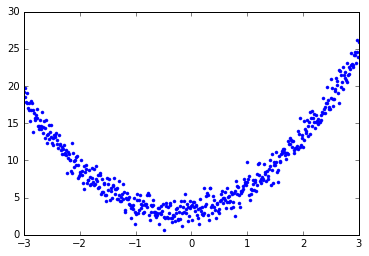

In [9]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig =  3.3 + 1.1*x + 2*x**2
## Add white noise
y =  y_orig + 1*np.random.randn(N)
plt.plot(x, y, '.')

4.6372756212443935

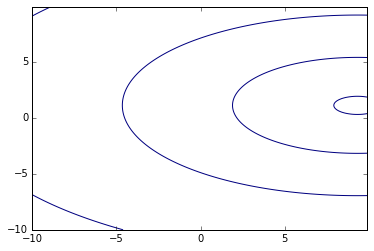

In [10]:
w0 = np.arange(-10.0,10.0,0.1)
w1 = np.arange(-10.0,10.0,0.1)
W0,W1 = plt.meshgrid(w0, w1)
Z = loss_func(W0, W1, x, y)
plt.contour(W0, W1, Z, levels = np.logspace(0, 8, 20))
data = np.hstack((np.ones((N,1)), x[:,np.newaxis]))
weights = np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T), y)
weights
y_hat = np.dot(data, weights)
np.mean(np.sqrt((y_hat - y_orig)**2))

In [11]:
data = np.hstack((np.ones((N,1)), x[:,np.newaxis],  x[:,np.newaxis]**2,  
                  x[:,np.newaxis]**3))
weights = np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T), y)
weights
y_hat = np.dot(data, weights)
np.mean(np.sqrt((y_hat - y)**2))

0.82641392876917541

In [12]:
display(HTML('''<img src="./imgs/lecture-4/too-many-predictors.png" alt="Drawing" style="width: 750px;"/, align = "left">'''))

# Exercise 1


Define **condition number** of a matrix to be the ratio of the largest to smallet singular values. In this exercise we want to explore how the condition number is distributed for random IID matrices. 
1. Generate 2-by-2 matrix from IID draws from a Normal distribution with mean 0 and standard deviation 1.0 and compute the condition number.
2. Repeat step 1 for 1,000 (or more) times and display a histogram of to get a sense for how condition numbers are distributed



In [13]:
%%time 

d = 2
N = 1000
cond_nums = np.zeros(N)
for i in range(N):
    A = np.random.randn(d,d)
    _,s,_ = np.linalg.svd(A)
    cond_num = s[0]/s[-1]
    cond_nums[i] = cond_num

CPU times: user 111 ms, sys: 6.26 ms, total: 117 ms
Wall time: 29.7 ms


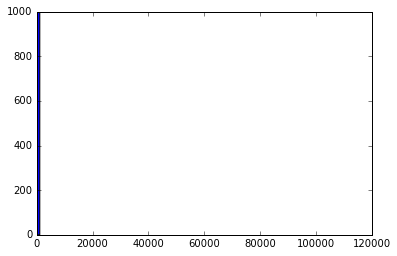

In [14]:
plt.hist(cond_nums, bins=100);

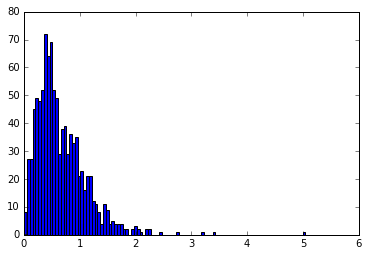

In [15]:
plt.hist(np.log10(cond_nums), bins=100);

In [16]:
np.mean(np.log10(cond_nums)), np.median(np.log10(cond_nums))

(0.65820125026039589, 0.54686707766434473)


# Exercise 2


Repeat exercise 1 but for
- 5-by-5 matrices
- 10-by-10
- 100-by-100
- *Optional:* create a boxplot for each of the cases so that you can show how the distributions vary for each case. A good resource for making visualizations in Python is: https://python-graph-gallery.com

In [17]:
def get_cond_nums(dim, num_samples):
    d = dim
    N = num_samples
    cond_nums = np.zeros(N)
    for i in range(N):
        A = np.random.randn(d,d)
        _,s,_ = np.linalg.svd(A)
        cond_num = s[0]/s[-1]
        cond_nums[i] = cond_num
        
    return cond_nums

In [18]:
dimensions = [5, 10, 100]

N = 1000

condition_numbers = {}

for dimension in dimensions:
    condition_numbers[dimension] = get_cond_nums(dim = dimension, num_samples = N)

In [19]:
df_cond_nums = pd.DataFrame.from_dict(condition_numbers, orient='index')
df_cond_nums["dimension"] = df_cond_nums.index

In [20]:
df_cond_nums_melt = pd.melt(df_cond_nums, id_vars= "dimension")

In [21]:
df_cond_nums_melt.head()

,dimension,variable,value
0,10,0,21.503514
1,100,0,849.315323
2,5,0,30.580423
3,10,1,15.754252
4,100,1,253.384913


In [22]:
df_cond_nums_melt.value = np.log10(df_cond_nums_melt.value)

In [23]:
df_cond_nums_melt.groupby("dimension").agg(np.median)

,value
dimension,
5,1.150467
10,1.494918
100,2.548129


# Exercise 3 

Repeat exercise 2 but modify each matrix generated to be duplicated horizontally. So if you generated a matrix $A \in \mathbb{R}^{n\times n}$, modify this matrix to $B = 
\begin{bmatrix}
A & A
\end{bmatrix}$

In [24]:
def get_cond_nums_ex3(dim, num_samples):
    d = dim
    N = num_samples
    cond_nums = np.zeros(N)
    for i in range(N):
        A = np.random.randn(d,d)
        B = np.hstack((A,A))
        _,s,_ = np.linalg.svd(B)
        cond_num = s[0]/s[-1]
        cond_nums[i] = cond_num
        
    return cond_nums

In [25]:
dimensions = [5, 10, 100]

N = 1000

condition_numbers = {}

for dimension in dimensions:
    condition_numbers[dimension] = get_cond_nums_ex3(dim = dimension, num_samples = N)
    
df_cond_nums = pd.DataFrame.from_dict(condition_numbers, orient='index')
df_cond_nums["dimension"] = df_cond_nums.index 

df_cond_nums_melt = pd.melt(df_cond_nums, id_vars= "dimension")
df_cond_nums_melt.value = np.log10(df_cond_nums_melt.value)

df_cond_nums_melt.groupby("dimension").agg(np.median)

,value
dimension,
5,1.114990
10,1.491299
100,2.534196


# Exercise 3a

In [26]:
def get_cond_nums_ex3a(dim, num_samples, sig = .1):
    d = dim
    N = num_samples
    cond_nums = np.zeros(N)
    for i in range(N):
        A = np.random.randn(100,d)
        _,s,_ = np.linalg.svd(A)
        cond_num = s[0]/s[-1]
        #cond_num = np.max(s)/np.min(s)
        cond_nums[i] = cond_num
        
    return cond_nums

In [27]:
dimensions = [100, 110, 140, 190,200]

N = 1000

condition_numbers = {}

for dimension in dimensions:
    condition_numbers[dimension] = get_cond_nums_ex3a(dim = dimension, num_samples = N)
    
df_cond_nums = pd.DataFrame.from_dict(condition_numbers, orient='index')
df_cond_nums["dimension"] = df_cond_nums.index 

df_cond_nums_melt = pd.melt(df_cond_nums, id_vars= "dimension")
df_cond_nums_melt.value = np.log10(df_cond_nums_melt.value)

df_cond_nums_melt.groupby("dimension").agg(np.median)

,value
dimension,
100,2.557550
110,1.524005
140,1.027926
190,0.767631
200,0.737167


# Exercise 3b

In [28]:
def get_cond_nums_ex3b(dim, num_samples, sig = .1):
    d = dim
    N = num_samples
    cond_nums = np.zeros(N)
    for i in range(N):
        A = np.random.randn(d,d)
        B = np.hstack((A,A + sig*np.random.randn(d,d)))
        _,s,_ = np.linalg.svd(B)
        cond_num = s[0]/s[-1]
        cond_nums[i] = cond_num
        
    return cond_nums

In [29]:
dimensions = [5, 10, 100]

N = 1000

condition_numbers = {}

for dimension in dimensions:
    condition_numbers[dimension] = get_cond_nums_ex3b(dim = dimension, num_samples = N)
    
df_cond_nums = pd.DataFrame.from_dict(condition_numbers, orient='index')
df_cond_nums["dimension"] = df_cond_nums.index 

df_cond_nums_melt = pd.melt(df_cond_nums, id_vars= "dimension")
df_cond_nums_melt.value = np.log10(df_cond_nums_melt.value)

df_cond_nums_melt.groupby("dimension").agg(np.median)

,value
dimension,
5,1.123585
10,1.370268
100,1.615521


## Exercise 4

Repeat exercise 2 for the 100-by-100 matrix but apply a smoothing function to each row for each of the matrices you generated. The smoothing function can be a simple "moving average window" filter.

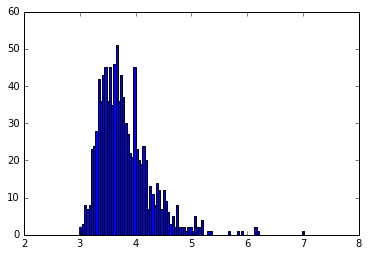

In [81]:
from scipy.linalg import toeplitz


def get_correlated_matrix(d, window_length):
    first_row = np.hstack((np.ones(window_length), np.zeros(d - window_length)))
    first_col = np.zeros(d)
    first_col[0] = 1

    moving_avg = 1./window_length * toeplitz(first_col, first_row)

    matrix_rows = np.zeros((d,d))
    for i in range(d):
        x = np.random.randn(d,1)
        matrix_rows[i,:] = np.dot(moving_avg, x).T

    return matrix_rows

N = 1000
cond_nums = np.zeros(N)
window_length = 5
for i in range(N):
    A = get_correlated_matrix(100, window_length)
    _,s,_ = np.linalg.svd(A)
    cond_num = s[0]/s[-1]
    cond_nums[i] = cond_num
plt.hist(np.log10(cond_nums), bins=100);

In [89]:
np.mean(np.log10(cond_nums))

3.7947379018317657

#AirBnB  OLS

In [30]:
df = pd.read_csv("./data/sd-airbnb-listings.csv")
df["price"] = df["price"].replace( '[\$,)]','', regex=True).astype(float)

In [31]:
df_mini = df[['review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', 'square_feet', 'price']]

df_clean= df_mini.dropna()

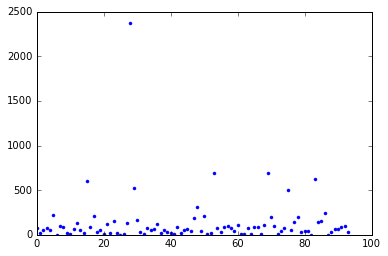

In [32]:
y = np.array(df_clean.price)
A = np.array(df_clean.iloc[:,:-1])

weights = np.dot(np.linalg.pinv(A),np.log10(y))

y_hat = np.dot(A,weights)

plt.plot(range(y_hat.shape[0]), np.abs(10**y_hat - y), '.');

In [33]:
np.mean(np.abs(10**y_hat - y))

130.19225666076923

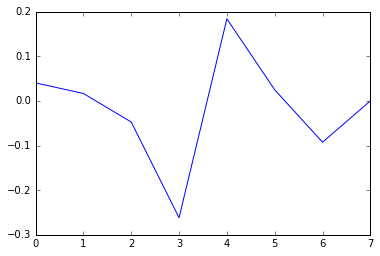

In [34]:
plt.plot(weights)

In [35]:
df_clean.square_feet = np.log10(1+df_clean.square_feet)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
y = np.array(df_clean.price)
A = np.array(df_clean.iloc[:,:-1])

weights = np.dot(np.linalg.pinv(A),np.log10(y))

y_hat = np.dot(A,weights)

np.mean(np.abs(10**y_hat - y))

126.04129468689042

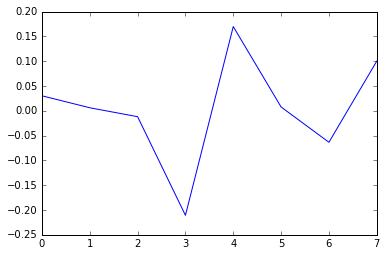

In [37]:
plt.plot(weights)

In [38]:
means = np.mean(A, axis = 0)

In [39]:
A_centered = A - means

In [40]:
A_ones = np.hstack((np.ones((df_clean.shape[0],1)), A_centered))

weights = np.dot(np.linalg.pinv(A_ones),np.log10(y))

y_hat = np.dot(A_ones,weights)

np.mean(np.abs(10**y_hat - y))

123.92894791645296

## Bootstrapped error estimation

In [41]:
indx = np.random.randint(0, A_ones.shape[0], size = A_ones.shape[0])

In [42]:
A_ones[indx,:].shape

(94, 9)

In [43]:
def get_weights():
    A_ones = np.hstack((np.ones((df_clean.shape[0],1)), A_centered))
    
    indx = np.random.randint(0, A_ones.shape[0], size = A_ones.shape[0])    
    A_ones_samples = A_ones[indx,:]

    weights = np.dot(np.linalg.pinv(A_ones_samples),np.log10(y))
    
    y_hat = np.dot(A_ones,weights)

    return np.mean(np.abs(10**y_hat - y)), weights

In [44]:
mae, sampled_weights = get_weights()

In [45]:
maes = np.zeros((100,1))
sampled_weights = np.zeros((100, weights.shape[0]))

for i in range(100):
    maes[i], sampled_weights[i,:] = get_weights()

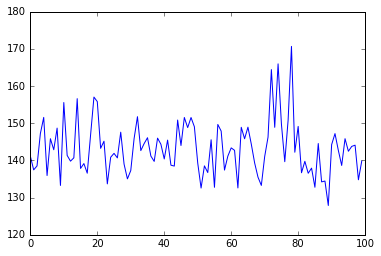

In [46]:
plt.plot(maes)

In [47]:
avg_weights = np.mean(sampled_weights,axis = 0)
sd_weights = np.std(sampled_weights, axis=0)

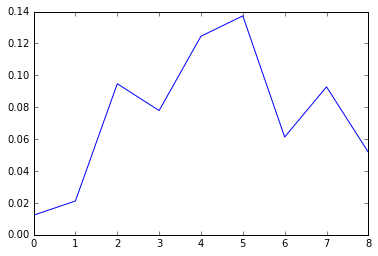

In [48]:
plt.plot(sd_weights)

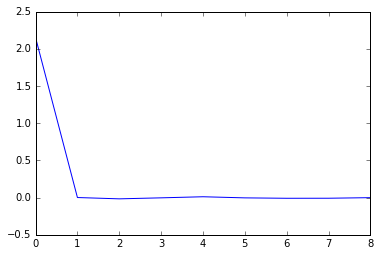

In [49]:
plt.plot(avg_weights)

## Ridge Regression

Having weights to be too large can be undesriable. This yields to one feature having more influence than it should. Ridge regression or "tikhonov" regularization" is a way to deal with this issue

$L(\beta) = (y - X\beta)^{T}(y - X\beta)^{T} + \lambda ||\beta||_{2}^{2}$

$\beta = (X^{T}X + \lambda I)^{+}X^{T}y$

In [50]:
display(HTML('''<img src="./imgs/lecture-4/ridge_regression_geomteric.png" alt="Drawing" style="width: 350px;"/, align = "left">'''))

## Airbnb Ridge Regression

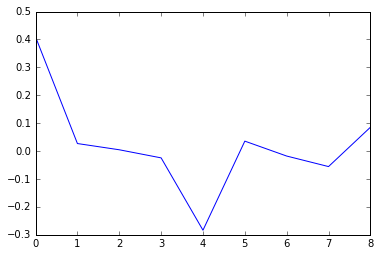

In [51]:
tikhnov = np.zeros((9,9))
tikhnov[0,0] = 1
weights = np.dot(np.dot(np.linalg.inv(np.dot(A_ones.T,A_ones) + 40e1*tikhnov), A_ones.T), np.log10(y))
y_hat = np.dot(A_ones,weights)

np.mean(np.abs(10**y_hat - y))
plt.plot(weights)

## Gradient Descent 

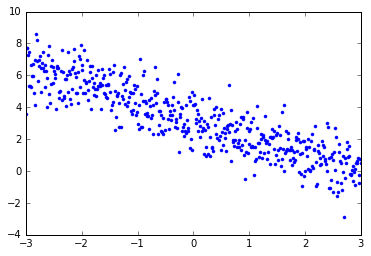

In [52]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig =  3.3 -1.1*x 
## Add white noise
y =  y_orig + 1*np.random.randn(N)
plt.plot(x, y, '.')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

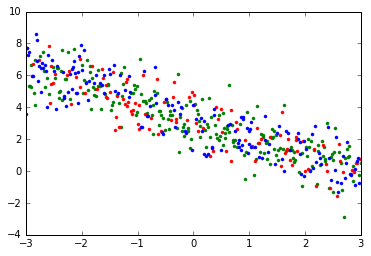

In [54]:
plt.plot(X_train, y_train, 'g.')
plt.plot(X_val, y_val, 'r.')
plt.plot(X_test, y_test, 'b.')

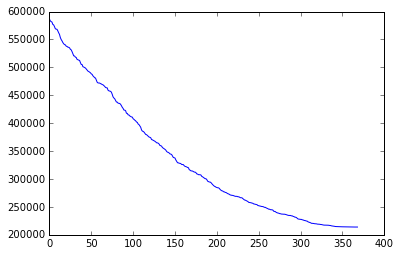

In [55]:
w = np.random.randn(2,1)

num_iter = 1000
weights = []
weights.append(w)


def mse(w, X, y):
    return np.sum((y - w[0,0]-w[1,0]*X)**2)

loss = mse(w, X_train[:,np.newaxis], y_train)
losses = []
losses.append(loss)
for i in range(num_iter):
    w_new = w + .01*np.random.randn(2,1)
    new_loss = mse(w_new, X_train[:,np.newaxis], y_train)
    if new_loss < loss:
        loss = new_loss
        w = w_new
        weights.append(w)
        losses.append(loss)
        
weights = np.array(weights).squeeze()
plt.plot(losses)


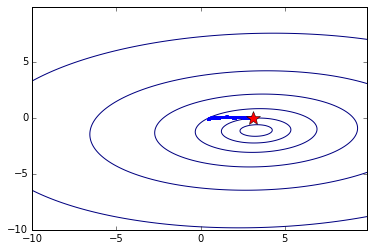

In [56]:
def loss_func(w0, w1, X, y):
    losses = 0
    for i in range(X.shape[0]):
        losses += (w0 + X[i]*w1 - y[i])**2
    return losses
 
w0 = np.arange(-10.0,10.0,0.1)
w1 = np.arange(-10.0,10.0,0.1)
W0,W1 = plt.meshgrid(w0, w1)
Z = loss_func(W0, W1, X_test, y_test)
plt.contour(W0, W1, Z, levels = np.logspace(0, 8, 20))
plt.plot(weights[:,0], weights[:,1], 'b.', markersize=5)
plt.plot(weights[-1,0], weights[-1,1], 'r*', markersize=15)

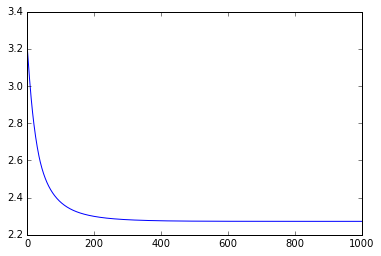

In [57]:
X_hat_train = np.hstack((np.ones((X_train.shape[0],1)), X_train[:,np.newaxis]))
X_hat_val = np.hstack((np.ones((X_val.shape[0],1)), X_val[:,np.newaxis]))
w = 0.01*np.random.randn(2,1)
alpha = 1e-2
train_error = []
validation_error = []
for i in range(1000):    
    y_hat_train = np.dot(X_hat_train, w)
    train_error.append(np.mean(np.abs(y_hat_train - y_train)))
    
    y_hat_val = np.dot(X_hat_val, w)
    validation_error.append(np.mean(np.abs(y_hat_val - y_val)))

    

    w = w + (alpha/X_hat_train.shape[0])*(np.dot(X_hat_train.T, y_train[:,np.newaxis] - y_hat_train))
    
    

    if len(train_error) > 5:
        if np.abs(train_error[-1] - train_error[-2]) < 1e-2:
            alpha = .99*alpha


w
plt.plot(train_error)

# Probability

You can think of a prograbability as a type of function that can take any input that can be described as sets (which is a very large class of inputs) and outputs a positive number between 0 and 1. There are some other special constraints for this function (such as the probability function must map the empty set to 0 and all elements in the set to 1), but the general gist is that a probability can be thought of us just another type of function with some special properties. 

More formally, the ingredients and nomenclature we use for the input types are: 

-  **Sample space** $\Omega$: The set of all outcomes we may encounter in the world. For example, if we are interested in a world that only consists of coin tosses, then we can write $\Omega = \{Heads, Tails\}$. Each outcome $\omega \in \Omega$ can be thought one particular type of outcome that we may encouter. For example, $\omega = \{Heads\}$. 
-  **Set of events** (or **event space**) or just **events** $\mathcal{F}$: A set whose elements $A \in \mathcal{F}$ are subsets of $\Omega$ (i.e., $A \in \Omega$ is a collection of possible outcomes of an experiment). For example, in a dice exeperiment $A = \{1,3,5\}$ is the event of odd-numbered outcomes. 


The probability function that maps the sets into real numbers must satisfy the following

- **Probability measure**: A function $P:\mathcal{F} \rightarrow \mathbb{R}$ that satisfies the following properties:
    - $P\left(A\right) \geq 0$, for all $A \in \mathcal{F}$
    - $P\left(\Omega\right) = 1$ (the probability of everything is 1)
    - $P\left(\emptyset\right) = 0$ (probability of the empty set is 0)
    - If $A_1,A_2,\dots$ are disjoint events (i.e., $A_i \cap A_j = \emptyset$ whenever $i \neq j$), then:

<center>$P\left(\cup_{i}A_{i}\right) = \sum_{i}{P\left(A_i\right)}$</center>

### Properties


- If $A\subseteq B \Longrightarrow P\left(A\right) \leq P\left(B\right)$
    - A event $B$ that is "bigger" (contains) event $A$ should have a bigger or equal probability 
    - In a dice roll, if $B = \{1,3,5\}$ and $A = \{1,3,5\}$, then $P\left(A\right) \le P\left(B\right)$
- $P\left(A \cup B\right) = P\left(A\right) + P\left(B\right) - P\left(A \cap B\right)$
    - If $A \cap B = \emptyset$ (we say $A$ and $B$ are disjoint or **mutually exclusive**), then $P\left(A \cup B\right) = P\left(A\right) + P\left(B\right)$
- $P\left(\Omega \setminus  A\right) = 1 - P\left(A\right)$
    - "Carving" out evet $A$ from the universe of possibe outcomes will yield the probability of 1 minus the probability of the $A$
- **Law of Total Probability:** if $A_1,\dots,A_k$ are a set of disjoint events such that $\cup^{k}_{i=1}A_{i} = \Omega$, then


<center>$\sum^{k}_{i=1}{P\left(A_k\right) = 1}$</center>


##Conditional probability

Often times we know a particular event has happened and want to know how knolwedge of an event happening changes the probabilities of other events. The **conditional** probability of an event $A$ given that an event $B$ has happened: 

$P\left(A|B\right) \triangleq \dfrac{P\left(A \cap B\right)}{P\left(B\right)}$

This is read as "the probability of $A$ given that $B$ has occured" or more succinctly as "the probablity of $A$ given $B$".

One way of thinkng about this is that if we are told that some general thing has happened, what is the probability that a specific thing will happen? 

So for example, suppose I told you a dice roll was even. Then what is the probability that the the dice roll was a 2? Usually, the probability of getting a 2 is 1/6, but if you are told that the roll was even, then this knowledge helps you narrow the possible outcomes and readjust the probability to 1/3. If you are told that the roll was even, then the probability of getting any odd is 0.

Similarly, we could be told something specific has happend, and asked what is the probability of a specific happening. For example, if we are told that a 3 is rolled and what is the probability of an odd, then we know that the outcome for sure will be odd - so the probability of an odd number will be 1.0!! 

##Bayes' rule

It is not difficult to show from the definition of conditional probabilility that:

$P\left(A|B\right) = \dfrac{P\left(B|A\right)P\left(A\right)}{P\left(B\right)}$

This relation is used so often that it warrants being attributed to the first person to popularize it. One reason Bayes's rule is popular is that conditional probabilities are often easier to calculate than joint events $P\left(A \cap B\right)$. Also, thre are many instances where computing $P\left(A|B\right)$ is difficult but $P\left(B|A\right)$ is easy. 


## Independence

Sometimes, the probability of an event with knowledge of the conditional does not change it at all. This is when the events $A$ and $B$ do not overlap at all so $P\left(A \cap B\right) = P(A)P(B)$. In that case, we have

$P\left(A|B\right) = P(A)$

And similarly,

$P\left(B|A\right) = P(B)$

This is an extremely important property. For example, consider the experiment where I flip a coin 2 times. Given that the first flip was a head, what is the probability that the second toss is a head? 

We assume that the coin flips are *independent* and that the probability of the second flip has nothing to do with the first!

In [58]:
display(HTML('''<img src="./imgs/lecture-4/conditional_a.png" alt="Drawing" style="width: 350px;"/, align = "left">'''))

In [59]:
display(HTML('''<img src="./imgs/lecture-4/conditional_b.jpg" alt="Drawing" style="width: 300px;"/, align = "left">'''))

# Random variables

Random variables are neither random nor variable: a random variable is a function that maps elements from the sample space to a real numbers. It's helpful to always think of a ranodm variable as just another function that maps data from arbitraty inputs to real numbers. 



##Discrete random variable##


$P\left(X = k\right):= P\left(\{\omega: X\left(\omega\right) = k\}\right).$

Let's break this down a bit. We will start with the right hand side
- $\omega$ is an element from the sample space $\Omega$.
- We have defined a random variable (remember, just a function) $X(\cdot)$ that maps elements from $\Omega$ to the reals
- Furthermore, we have defined $X(\cdot)$ in such a way so that $X\left(\omega\right) = k$ with $k \in \mathbb{R}$
- Because we have defined $X(\cdot)$, we can say that the probability that event $\omega$ occurs is $P\left(\{\omega: X\left(\omega\right) = k\}\right)$

The notation on the right hand side is cumbersome, so we write it as the left hand side. The way we read the left hand side is "the probability that the random variable $X$ takes on the value $k$." We will often be even sloppier and just read the left hand side as "the probability that $X = k$. It's good to be aware that there is a lot of important detail packed into this equation! These details become important when doing "Bayesian" analysis. 




##Probability mass function (PMF)


$p_{X}\left(x\right) \triangleq P\left(X = x\right).$

- $0 \leq p_{X}\left(x\right) \leq 1.$
- $\sum_{x \in V\,al\left(X\right)}p_{X}\left(x\right) = 1.$
- $\sum_{x \in A}p_{X}\left(x\right) = P\left(X \in A\right).$


In [60]:
display(HTML('''<img src="./imgs/lecture-4/random-variable.png" alt="Drawing" style="width: 600px;"/, align = "left">'''))

##Continuous random variable

We need not map random variables to single values but a continous set of reals. This is especially useful when the number of elements in our set $\Omega$ is infinite. 

$P\left(a \leq X \leq b\right) := P\left(\{\omega: a\leq X\left(\omega\right) \leq b\}\right).$

## Cumulative distribution formula (CDF)

$F_{X}\left(x\right) \triangleq P\left(X \leq x\right).$


- $0 \leq F_X\left(x\right)\leq 1.$
- $\lim_{x\rightarrow -\infty} F_{X}\left(x\right) = 0.$
- $\lim_{x\rightarrow \infty} F_{X}\left(x\right) = 1.$
- $x \leq y \Longrightarrow F_{X}\left(x\right) \leq F_{X}\left(y\right).$


##Probability Density Function
$f_{X}\left(x\right) \triangleq \dfrac{dF_{X}\left(x\right)}{dx}.$

$P\left(x \leq X \leq x + \Delta x\right) \approx f_{X}\left(x\right)\Delta x.$



- $f_{X}\left(x\right) \geq 0.$
- $\int^{\infty}_{- \infty}{f_{X}\left(x\right)} = 1.$
- $\int_{x \in A}{f_{X}\left(x\right)dx} = P\left(X \in A\right).$


In [61]:
display(HTML('''<img src="./imgs/lecture-4/cdf-pdf.png" alt="Drawing" style="width: 400px;"/, align = "left">'''))

##Expectation
$E[g\left(X\right)] \triangleq \sum_{x \in V\,al\left(X\right)}{g\left(x\right)p_{X}\left(x\right)}.$

$E[g\left(x\right)] \triangleq \int^{\infty}_{- \infty}{g\left(x\right)f_{X}\left(x\right)dx}.$


- $E[a] = a$ for any constant $a \in \mathbb{R}$.
- $E[af\left(X\right)] = aE[f\left(X\right)]$ for any constant $a \in \mathbb{R}$.
- (Linearity of Expectation) $E[f\left(X\right) + g\left(X\right)] = E[f\left(X\right)] + E[g\left(X\right)]$.
- For a discrete random variable $X$, $E[1\{X = k\}] = P\left(X = k\right)$.


##Variance

$Var[X] \triangleq E[\left(X - E\left(X\right)\right)^2]$


$\begin{align*}
E[\left(X - E[X]\right)^2] &= E[X^2 -2E[X]X + E[X]^2]\\
&= E[X^2] - 2E[X]E[X] + E[X]^2\\
&= E[X^2] - E[X]^2\\
\end{align*}
$



##Discrete random variables


- $X \sim Bernoulli\left(p\right)$ ( where $0 \leq p \leq 1$): one if a coin with heads probability $p$ comes up heads, zero otherwise.

$\qquad
p(x) =\left\{\begin{array}{ll}
p&\text{if $p = 1$}\\
1-p&\text{if $p =0 $}
\end{array}\right.
$
- $X \sim Binomial\left(n,p\right)$ (where $0 \leq p \leq 1$): the number of heads in $n$ independent flips of a coin with heads probability $p$.

$\qquad
p(x) = \Bigg(\begin{matrix}n\\p\end{matrix}\Bigg)p^{x}\left(1-p\right)^{n-x}
$
- $X \sim Geometric\left(p\right)$ (where $p > 0$): the number of flips of a coin with heads probability $p$ until the first heads.

$\qquad
p(x) = p\left(1-p\right)^{x-1}
$
- $X \sim Poisson\left(\lambda\right)$ (where $\lambda > 0$): a probability distribution over the nonnegative integers used for modeling the frequency of rare events.

$\qquad
p\left(x\right) = e^{-\lambda}\dfrac{\lambda}{x!}
$


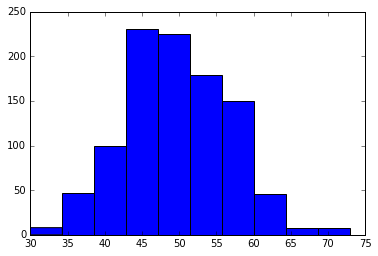

In [62]:
# binomial

n, p = 1000, .05
s = np.random.binomial(n, p, 1000)
plt.hist(s);

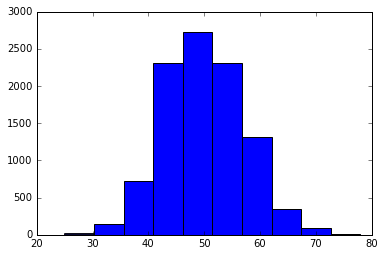

In [63]:
# poisson approximating binomial

s = np.random.poisson(p*n, 10000)
plt.hist(s);

##Continuous random variables

- $X \sim Uniform\left(a,b\right)$ (where $a < b$): equal probability density to every value between $a$ and $b$ on the real line.

$\qquad
f\left(x\right) = \left\{\begin{array}{ll}
\frac{1}{a - b} &\text{if $a \leq x \leq b$}\\
0&\text{otherwise}
\end{array}\right.
$
- $X \sim Exponential\left(\lambda\right)$ (where $\lambda > 0$): decaying probability density over the nonnegative reals.

$\qquad
f\left(x\right)=\left\{\begin{array}{ll}
\lambda e^{-\lambda x}&\text{if $x\ge0$}\\
0&\text{otherwise}
\end{array}\right.
$
- $X \sim Normal\left(\mu,\sigma^2\right)$: also know as the Gaussian distribution

$\qquad
f(x) = \dfrac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}\left(x - \mu\right)^2}
$

##Joint cumulative distribution function

$
F_{XY}(x,y) = P(X \leq x, Y \leq y)
$

$\begin{align*}
F_X(x) &= \lim_{y\rightarrow \infty}{F_{XY}(x,y)dy}\\
F_Y(y) &= \lim_{x\rightarrow \infty}{F_{XY}(x,y)dx}
\end{align*}$

##Marginal cumulative distribution functions of $F_{XY}(x,y)$

**Properties:**


- $0 \leq F_{XY}(x,y) \leq 1$.
- $\lim_{x,y\rightarrow \infty}F_{XY}(x,y) =1$.
- $\lim_{x,y\rightarrow -\infty}F_{XY}(x,y) = 0$.
- $F_{X}(x) = \lim_{y\rightarrow \infty}F_{XY}(x,y)$.

$
p_X(x) = \sum_{y}{p_{XY}(x,y)}
$

We refer to $p_{X}(x)$ as the **marginal probability mass function** of $X$.

##Marginal probability density function (or marginal density)

$
f_{X}(x) = \int^{\infty}_{-\infty}{f_{XY}(x,y)dy}
$


##Conditional distributions

$
p_{Y|X}(y|x) = \dfrac{p_{XY}(x,y)}{p_X(x)}
$

assuming that $p_X(x) \neq 0$.

##Independence

Two random variables $X$ and $Y$ are **independent** if $F_{XY}(x,y) = F_X(x)F_Y(y)$ for all values of $x$ and $y$.


##Expectation and covariance

$
E[g(X,Y)] \triangleq \sum_{x\in V\,al(X)} \sum_{y\in V\,al(Y)} g(x,y)p_{XY}(x,y).
$

$
E[g(X,Y)] = \int^{\infty}_{-\infty}\int^{\infty}_{-\infty} g(x,y)f_{XY}(x,y)dxdy.
$

$
\begin{align*}
Cov[X,Y] &= E[(X - E[X])(Y - E[Y])]\\
&= E[XY - XE[Y] - YE[X] + E[X]E[Y]]\\
&= E[XY] -E[X]E[Y] - E[Y]E[X] + E[X]E[Y]]\\
&= E[XY] -E[X]E[Y].
\end{align*}
$

When $Cov[X,Y] = 0$, we say that $X$ and $Y$ are **uncorrelated**. However, this is not the same thing as stating that $X$ and $Y$ are independent! For example, if $X \sim Uniform(-1,1)$ and $Y = X^2$, then one can show that $X$ and $Y$ are uncorrelated, even though they are not independent.

**Properties**


- **Linearity of expectation** $E[f(X,Y) + g(X,Y)] = E[f(X,Y)] + E[g(X,Y)]$.
- $Var[X+Y] = Var[X] + Var[Y] + 2Cov[X,Y]$.
- If $X$ and $Y$ are independent, then $Cov[X,Y] = 0$.
- If $X$ and $Y$ are independent, then $E[f(X)g(Y)] = E[f(X)]E[g(Y)]$.


##Chain Rule

$\begin{align*}
f(x_1,x_2,\ldots,x_n) &= f(x_n|x_1,x_2,\ldots,x_{n-1})f(x_1,x_2,\ldots,x_{n-1})\\
&= f(x_n|x_1,x_2,\ldots,x_{n-1})f(x_{n-1}|x_1,x_2,\ldots,x_{n-2})f(x_1,x_2,\ldots,x_{n-2})\\
&= \ldots = f(x_1)\prod\limits^{n}_{i=2}f(x_i|x_1,\ldots,x_{i-1}).
\end{align*}$



##Expectation

Consider an arbitrary function from $g:\mathbb{R}^n \rightarrow \mathbb{R}$. The expected value of this function is defined as

$
E[g(X)] = \int_{\mathbb{R}^n} g(x_1,x_2,\ldots,x_n)f_{X_1,X_2,\ldots,X_n}(x_1,x_2,\ldots,x_n)dx_1dx_2\ldots dx_n,
$

where $\int_{\mathbb{R}^n}$ is $n$ consecutive integrations from $-\infty$ to $\infty$. If $g$ is a function from $\mathbb{R}^n$ to $\mathbb{R}^m$, then the expected value of $g$ is the element-wise expected values of the output vector, i.e., if $g$ is 

$
g(x) = \begin{bmatrix} g_1(x)\\g_2(x)\\ \vdots \\ g_m(x) \end{bmatrix}
$

Then,

$
E[g(X)] = \begin{bmatrix} E[g_1(X)]\\ E[g_2(X)]\\ \vdots \\ E[g_m(X)] \end{bmatrix}
$

##Covariance matrix: 

For a given random vector $X: \Omega \rightarrow \mathbb{R}^n$, its covariance matrix $\Sigma$ is the $n\times n$ square matrix whose entries are given by $\Sigma_{ij} = Cov[X_i, X_j]$.


From the definition of covariance, we have

$
\begin{align*}
\Sigma &= \begin{bmatrix} Cov[X_1,X_1] & \cdots & Cov[X_1,X_n]\\
\vdots & \ddots & \vdots\\
Cov[X_n,X_1] & \cdots & Cov[X_n,X_n] \end{bmatrix}\\
&= \begin{bmatrix} e[X^{2}_{1}] - E[X_1]E[X_1] & \cdots & E[X_1X_n] - E[X_1]E[X_n]\\
\vdots & \ddots & \vdots \\
e[X_nX_1] - E[X_n]E[X_1] & \cdots & E[X^{2}_{n}] - E[X_n]E[X_n] \end{bmatrix}\\
&= \begin{bmatrix} E[X^{2}_{1}] & \cdots & E[X_1X_n]\\
\vdots & \ddots & \vdots \\
E[X_nX_1] & \cdots & E[X^{2}_{n}] \end{bmatrix} - \begin{bmatrix} E[X_1]E[X_1] & \cdots & E[X_1]E[X_n]\\
\vdots & \ddots & \vdots \\
E[X_n]E[X_1] & \cdots & E[X_n]E[X_n] \end{bmatrix}\\
&= E[XX^T] - E[X]E[X]^T = \ldots = E[(X - E[X])(X - E[X])^T].
\end{align*}
$

where the matrix expectation is defined in the obvious way.

The covariance matrix has a number of useful properties:


- $\Sigma \succeq 0$; that is, $\Sigma$ is positive semidefinite.
- $\Sigma = \Sigma^T$; that is, $\Sigma$ is symmetric.


##The multivariate Gaussian distribution

A random vector $X \in \mathbb{R}^n$ is said to have a multivariate normal (or Gaussian) distribution with mean $\mu \in \mathbb{R}^n$ and covariance matrix $\Sigma \in \mathbb{S}^{n}_{++}$ (where $\mathbb{S}^{n}_{++}$ refers to the space of symmetric positive definite $n\times n$ matrices)

$
f_{X_1,X_2,\ldots,X_n}(x_1,x_2,\ldots,x_n;\mu, \Sigma) = \dfrac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp \Bigg(-\dfrac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\Bigg).
$



##Bayes's rule

$
P_{Y|X}(y|x) = \dfrac{P_{XY}(x,y)}{P_{X}(x)} = \dfrac{P_{X|Y}(x|y)P_Y(y)}{\sum_{y' \in V\,al(Y)}P_{X|Y}(x|y')P_Y(y')}.
$


**Frequentism**: a coin is flipped 1000 times and is always heads. The probability of heads for flip 1001: 1/2


**Bayesianism**: a coin is flipped 1000 times and is always tails. The probability of heads for flip 1001: 0.99999

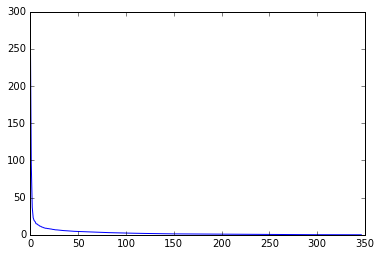

In [64]:
df = pd.read_csv("./data/trian-har.csv")

df_subject = df[df.subject == 1]

data = np.array(df_subject.iloc[:,:-2])

U, s, V = np.linalg.svd(data)
plt.plot(s);

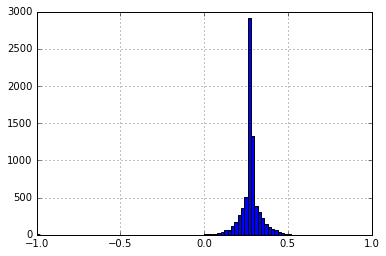

In [65]:
df.iloc[:,0].hist(bins = 100)

In [66]:
data_projected = np.dot(V, data.T).T

In [67]:
x1 = data_projected[:,0]
x2 = data_projected[:,1]

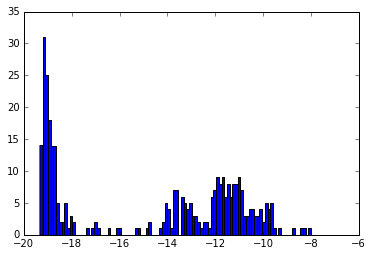

In [68]:
plt.hist(x1, bins=100);

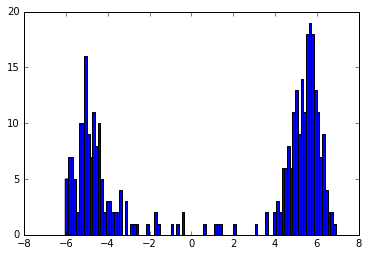

In [69]:
plt.hist(x2, bins=100);

In [70]:
labels = df.Activity

In [71]:
y = np.zeros(labels.shape[0])

In [72]:
activity_codes = {
    "STANDING": "red", "SITTING": "green", "LAYING": "blue", "WALKING": "yellow",
    'WALKING_DOWNSTAIRS': "cyan", 'WALKING_UPSTAIRS': "orange" }



In [73]:
y[labels == "WALKING"] = 1
y[labels == "WALKING_DOWNSTAIRS"] = 1
y[labels == "WALKING_UPSTAIRS"] = 1

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  from IPython.kernel.zmq import kernelapp as app
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  app.launch_new_instance()
